In [1]:
#In this case study, we're going to various applications of unsupervised learning methods
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

In [2]:
from PIL import Image
import os, os.path

imgs = []
labels = []
path = "chars"
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(path)[:5000]:
    labels.append(int(f.split('_')[-1][:-4]))
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(np.ndarray.flatten(np.array(Image.open(os.path.join(path,f)))))

imgs = np.asarray(imgs)    

In [3]:
#from numpy import genfromtxt
#my_data = genfromtxt('chinese_mnist.csv', delimiter=',', encoding="utf8")
#labels = my_data[:100,3]

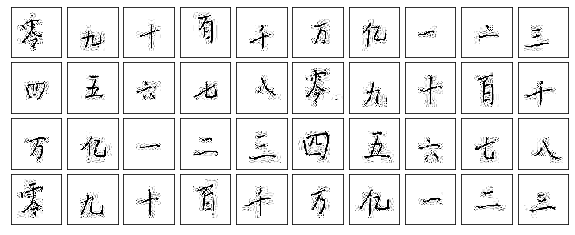

In [4]:
#Let's plot some of the figures...
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4),subplot_kw = {'xticks':[], 'yticks':[]},
                            gridspec_kw = dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(64,64), cmap = 'binary', interpolation='nearest', clim=(0,16))
plot_digits(imgs)

In [5]:
#We'll project this from 64-dim to 5-dim via PCA
pca = PCA(100)
projected = pca.fit_transform(imgs)
print(imgs.shape)
print(projected.shape)

(5000, 4096)
(5000, 100)


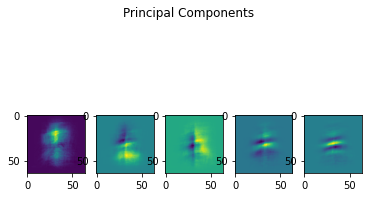

In [6]:
#Let's visualize the first 5 principal components
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.suptitle('Principal Components')
ax1.imshow(np.reshape(pca.components_[0],(64,64)))
ax2.imshow(np.reshape(pca.components_[1],(64,64)))
ax3.imshow(np.reshape(pca.components_[2],(64,64)))
ax4.imshow(np.reshape(pca.components_[3],(64,64)))
ax5.imshow(np.reshape(pca.components_[4],(64,64)))

Text(0, 0.5, '2-dim\nreconstruction')

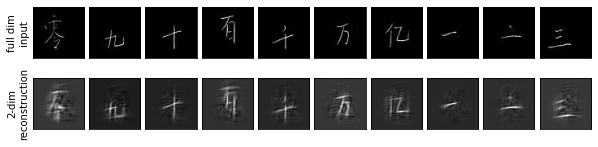

In [7]:
#Let's visualize what the figures look like, projected on to the 5-dim subspace
inv_proj = pca.inverse_transform(projected)
fig, ax = plt.subplots(2,10,figsize=(10,2.5),subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0,i].imshow(imgs[i].reshape(64,64),cmap='binary_r')
    ax[1,i].imshow(inv_proj[i].reshape(64,64), cmap='binary_r')
    
ax[0,0].set_ylabel('full dim\ninput')
ax[1,0].set_ylabel('2-dim\nreconstruction')

In [8]:
#Plot the cumulative sum of the explained variance
pca = PCA().fit(imgs)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')

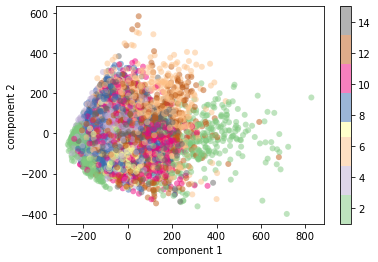

In [ ]:
#Let's plot the 2-d projection
plt.scatter(projected[:,0], projected[:,1], c = labels, edgecolor='none', alpha = 0.5, cmap=plt.cm.get_cmap('Accent',15))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

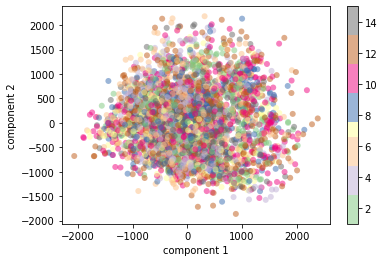

In [ ]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
projected_Iso = embedding.fit_transform(imgs)
#Let's plot the 2-d projection
plt.scatter(projected_Iso[:,0], projected_Iso[:,1], c = labels, edgecolor='none', alpha = 0.5, cmap=plt.cm.get_cmap('Accent',15))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
